STOCK PRICE ANALYSIS
=========

__Importing libraries__

In [199]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
import glob

__loading datasets__

In [201]:

glob.glob(r'C:\Users\varma\OneDrive\Desktop\Data Analytics\Python Analysis Projects\sp/*csv')

['C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\AAL_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\AAPL_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\AAP_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ABBV_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ABC_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ABT_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ACN_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ADBE_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ADI_data.csv',
 'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\ADM_data.csv

In [202]:
#checking how many of them has loaded
len(glob.glob(r'C:\Users\varma\OneDrive\Desktop\Data Analytics\Python Analysis Projects\sp/*csv'))

509

In [203]:
#taking the datasets of few companies like amaon,apple,google,microsoft to perform analysis
company_list=[r'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\AAPL_data.csv',
              r'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\AMZN_data.csv',
              r'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\GOOG_data.csv',
              r'C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\MSFT_data.csv'


    
]

In [204]:
#importing warnings module 
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [205]:
#concatenating all data sets we have taken
df=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(file)
    df=pd.concat([df,current_df],ignore_index=True)
    



In [206]:
#checking shape of data frame
df.shape


(4752, 7)

In [207]:
#checking size of data frame
df.size

33264

In [208]:
#checking data of top rows
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [209]:
##checking data of bottom rows
df.tail()


,date,open,high,low,close,volume,Name
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT


In [210]:
#finfing data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [211]:
#statistical info about data
df.describe()


,open,high,low,close,volume
count,4752.000000,4752.000000,4752.000000,4752.000000,4.752000e+03
mean,344.075960,346.906095,340.992481,344.100091,2.465232e+07
std,329.660871,332.181676,326.876297,329.705792,2.956724e+07
min,27.350000,27.600000,27.230000,27.370000,7.932000e+03
25%,67.031000,67.668125,66.528900,66.836000,2.562696e+06
50%,153.740000,154.260000,152.685000,153.470000,1.796529e+07
75%,587.527500,592.625000,582.050000,587.092500,3.601633e+07
max,1477.390000,1498.000000,1450.040000,1450.890000,2.668336e+08


In [212]:
#checking for null values
df.isnull()

,date,open,high,low,close,volume,Name
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4747,False,False,False,False,False,False,False
4748,False,False,False,False,False,False,False
4749,False,False,False,False,False,False,False
4750,False,False,False,False,False,False,False


In [213]:
#checking for sum of null values
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [214]:
#finding unique compaies in data frame
df['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [215]:
#coverting date data type to date time
df['date']=pd.to_datetime(df['date'])

In [216]:
tech_comp=df['Name'].unique()

In [217]:
tech_comp

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

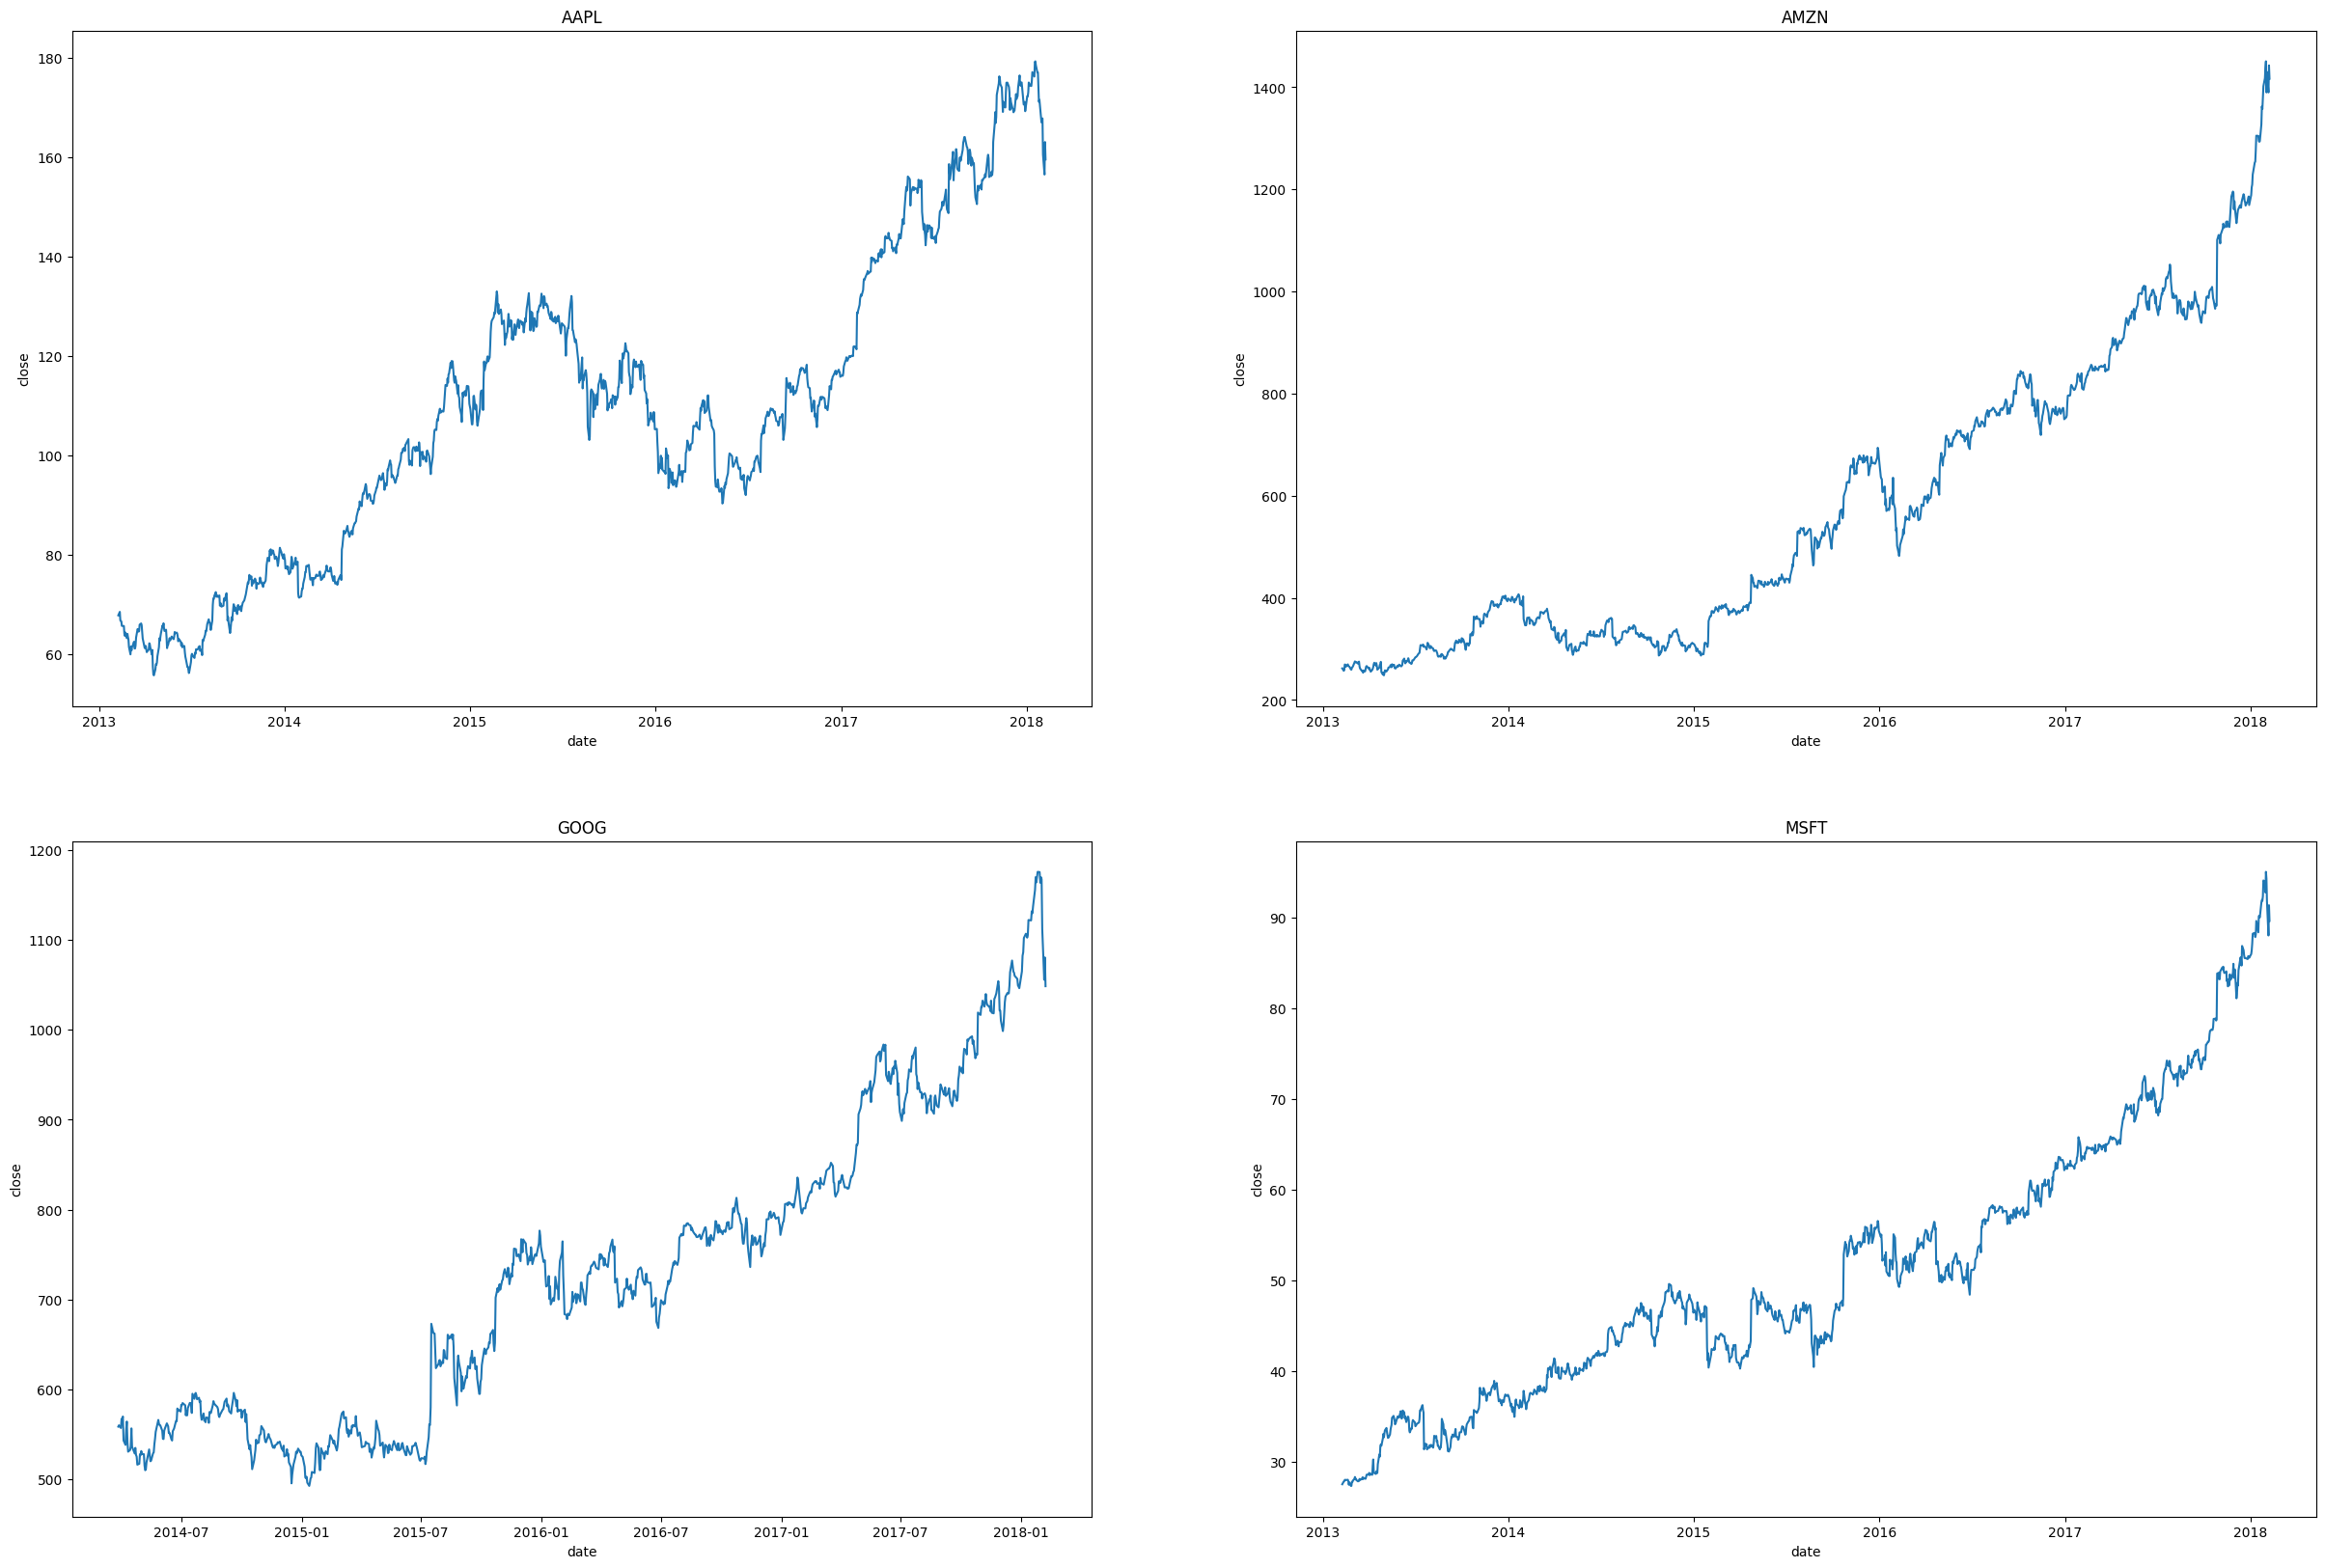

In [218]:
#plotting graph in between year and closing prices(changes in prices) of diff companies
plt.figure(figsize=(30,20))
for index, company in enumerate(tech_comp,1):
    plt.subplot(2,2,index)
    filter1=df["Name"]==company
    df2=df[filter1]
    sns.lineplot(data=df2,x=df2['date'],y=df2['close'])
    plt.title(company)
    plt.savefig("1.png")



  


    

In [219]:
#finding the moving average of various stocks
df['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [226]:
new_df=df.copy()

In [227]:
ma_day=[10,20,30]
for ma in ma_day:
    new_df['close_'+str(ma)]=new_df['close'].rolling(ma).mean()
    
     

new_df(14)

In [228]:
new_df.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_30
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,88.484333
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,88.756333
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,89.019000
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,89.217333
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,89.300000
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,89.494333
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,89.631000


In [229]:
new_df.set_index('date',inplace=True)

In [230]:
new_df


,open,high,low,close,volume,Name,close_10,close_20,close_30
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,89.019000
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,89.217333
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,89.300000


In [231]:
new_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_30'],
      dtype='object')

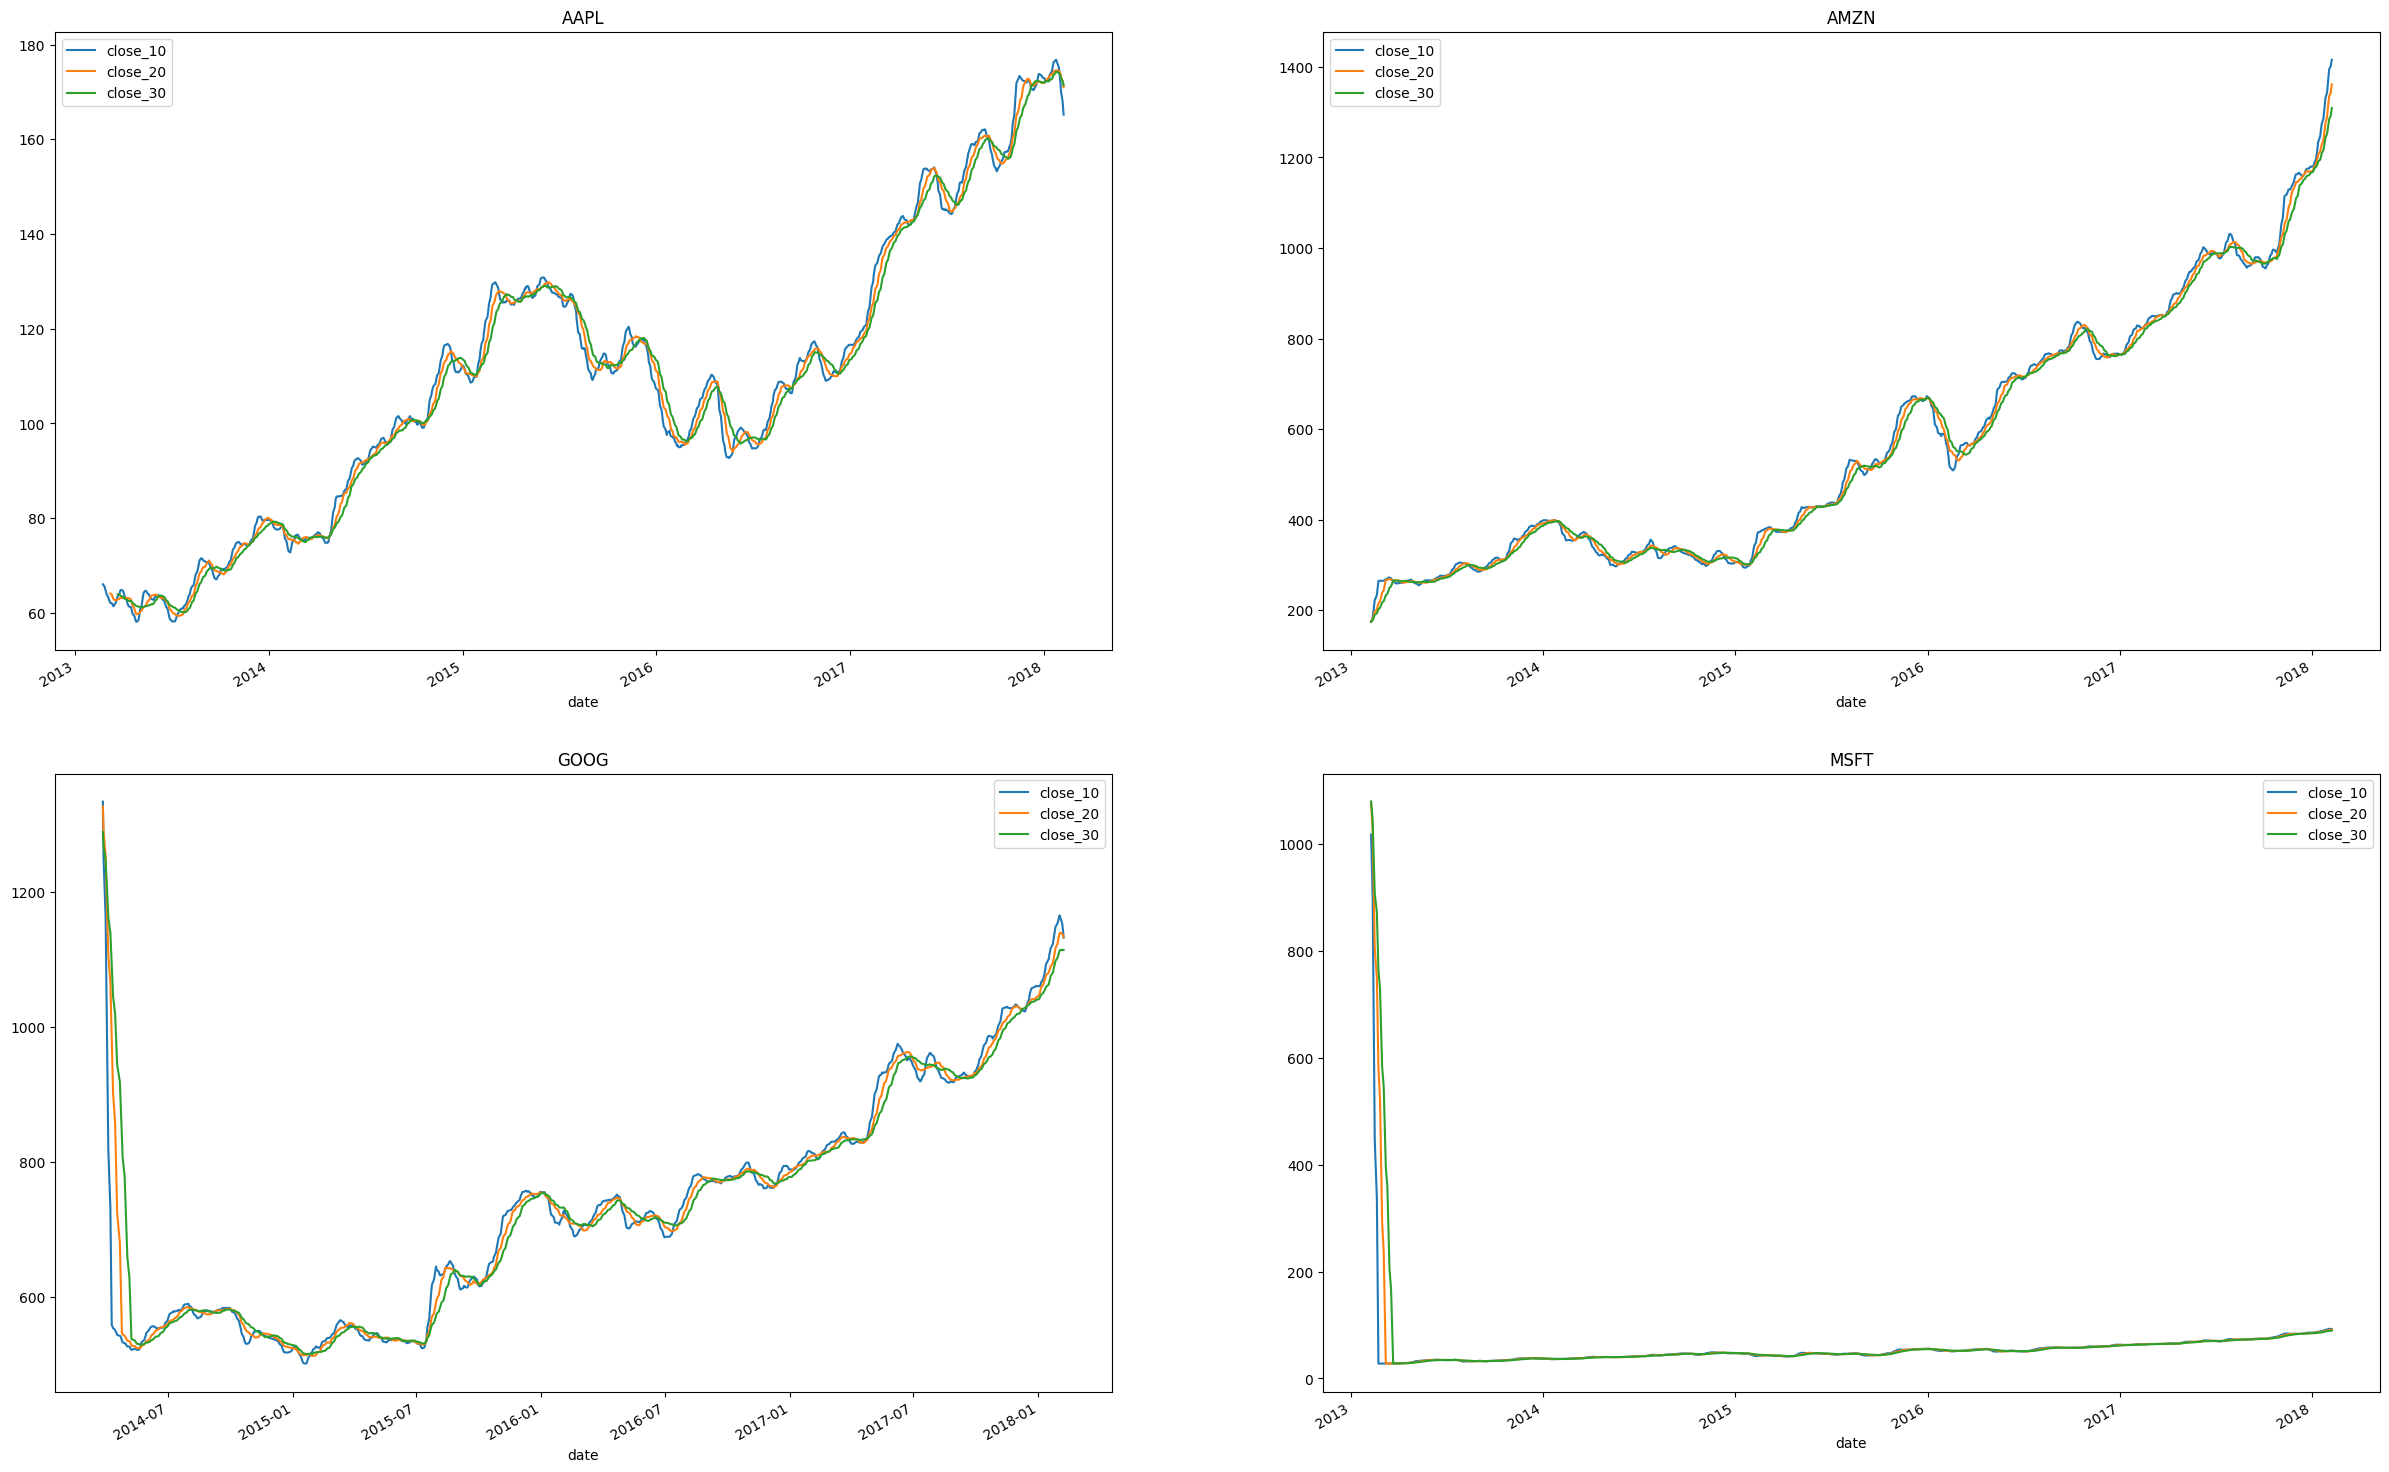

In [232]:
#plotting figure for moving average of companies with window sizes 10,20,30
plt.figure(figsize=(30,20))
for index, company in enumerate(tech_comp,1):
    plt.subplot(2,2,index)
    filter1=new_df["Name"]==company
    df2=new_df[filter1]
    df2[['close_10','close_20','close_30']].plot(ax=plt.gca())
    plt.title(company)
    plt.savefig("2.png")

In [233]:
#loading apple data set
apple=pd.read_csv('C:\\Users\\varma\\OneDrive\\Desktop\\Data Analytics\\Python Analysis Projects\\sp\\AAPL_data.csv')

In [234]:
apple


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [235]:
apple.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [236]:
#finding price change in apple stock
apple['close'].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [237]:
#finding daily returns of apple
apple['Daily Return(%)']=apple['close'].pct_change()*100

In [238]:
apple

,date,open,high,low,close,volume,Name,Daily Return(%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,4.179181


In [239]:
apple['date']=pd.to_datetime(df['date'])
apple.head()

,date,open,high,low,close,volume,Name,Daily Return(%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934


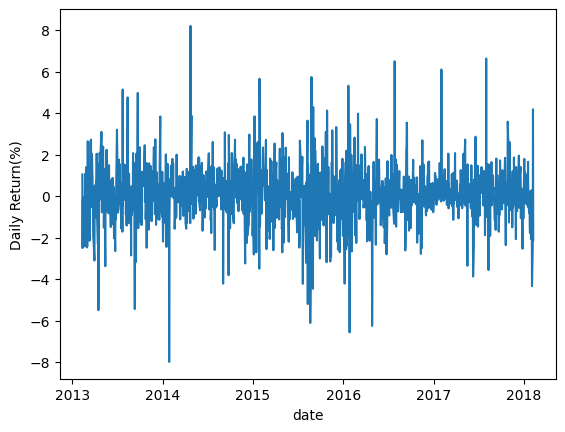

In [240]:
#plotting changes in prices of apple stock
sns.lineplot(data=apple,x='date',y='Daily Return(%)')
plt.savefig("3.png")

In [241]:
apple

,date,open,high,low,close,volume,Name,Daily Return(%)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL,4.179181


In [242]:
apple.set_index("date",inplace=True)

In [243]:
apple

,open,high,low,close,volume,Name,Daily Return(%)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.089934
...,...,...,...,...,...,...,...
2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL,0.209043
2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL,-4.339015
2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL,-2.498442


In [244]:
#performing sampling on apple data
apple['close'].resample('m').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: ME, Name: close, Length: 61, dtype: float64

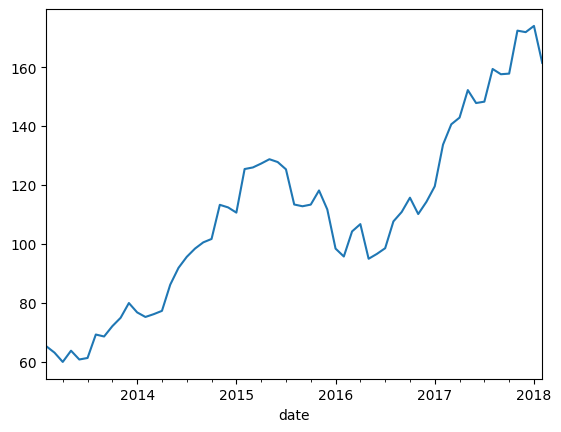

In [245]:
#sampling by monthly 
apple['close'].resample('m').mean().plot()
plt.savefig("4.png")

In [246]:
#sampling by yearly
apple['close'].resample('y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: YE-DEC, Name: close, dtype: float64

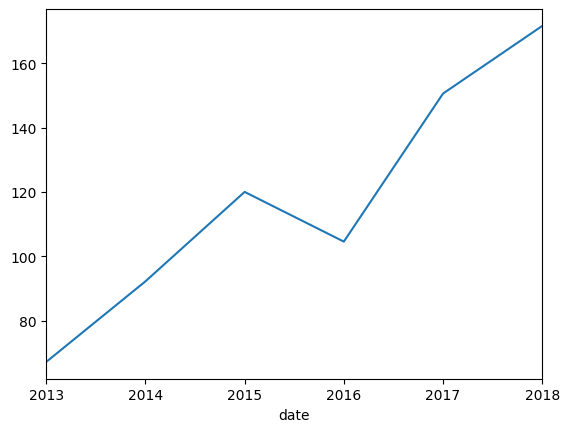

In [247]:

apple['close'].resample('y').mean().plot()
plt.savefig("5.png")

In [248]:
#sampling by daily
apple['close'].resample('d').mean()

date
2013-02-08     67.8542
2013-02-09         NaN
2013-02-10         NaN
2013-02-11     68.5614
2013-02-12     66.8428
                ...   
2018-02-03         NaN
2018-02-04         NaN
2018-02-05    156.4900
2018-02-06    163.0300
2018-02-07    159.5400
Freq: D, Name: close, Length: 1826, dtype: float64

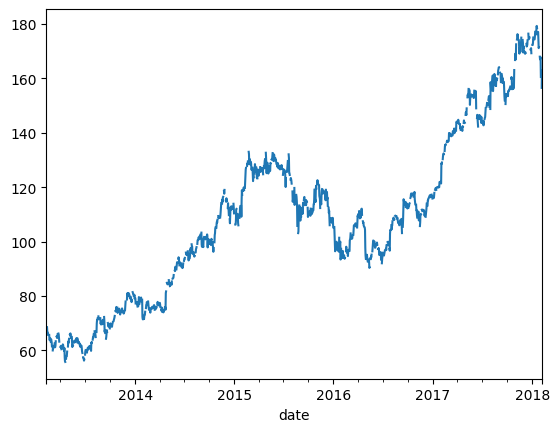

In [249]:
apple['close'].resample('d').mean().plot()
plt.savefig("6.png")

In [250]:
#multivariate analysis checking for corelation covariance between companies
app=pd.read_csv(company_list[0])
amaz=pd.read_csv(company_list[1])
google=pd.read_csv(company_list[2])
mcsft=pd.read_csv(company_list[3])

In [251]:
closing_price=pd.DataFrame()



In [252]:
closing_price['apple_close']=app["close"]
closing_price['amazon_close']=amaz['close']
closing_price['google_close']=google['close']
closing_price['microsoft_close']=mcsft['close']


In [253]:
closing_price

,apple_close,amazon_close,google_close,microsoft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


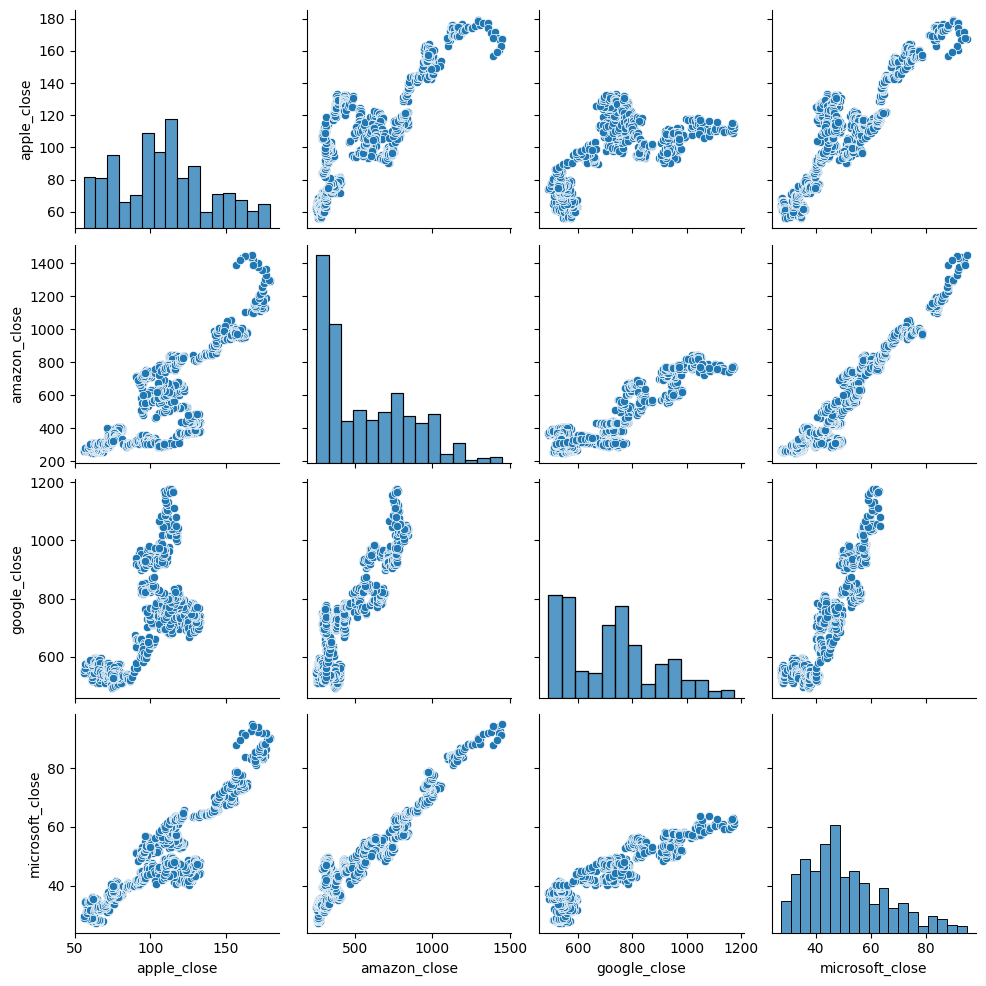

In [254]:
sns.pairplot(closing_price)
plt.savefig("7.png")

we can conclude that closing price of amazon and closing price of microsoft has direct corealation

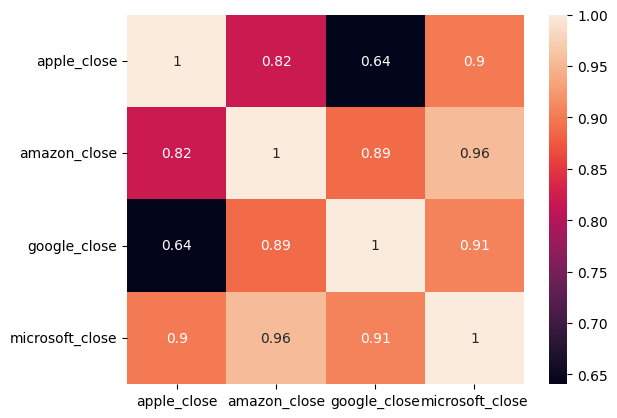

In [256]:
sns.heatmap(closing_price.corr(),annot=True)
plt.savefig("8.png")

Heatmap has clearly showed us that amazon and microsoft has highest corelation

_______________________________________________________________________________________________________________________________________________________
